In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys, os
opj = os.path.join
CODE_DIR = os.path.abspath('../..')
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'RPALib'))

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
from epypes.compgraph import CompGraph, CompGraphRunner
from epypes.pipeline import Pipeline
from rpa.io import open_image

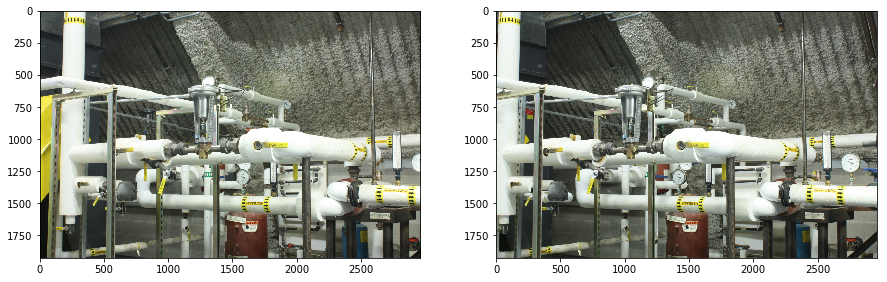

In [4]:
im1 = open_image(opj(CODE_DIR, 'DATA/IMG/stereo/pipes/L1/im0e2.png'), color_transform=cv2.COLOR_BGR2RGB)
im2 = open_image(opj(CODE_DIR, 'DATA/IMG/stereo/pipes/L1/im1e2.png'), color_transform=cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(im1)
plt.subplot(1, 2, 2)
plt.imshow(im2)

In [5]:
help(cv2.xfeatures2d.SIFT_create)
help(cv2.xfeatures2d.SURF_create)
help(cv2.ORB_create)

Help on built-in function SIFT_create:

SIFT_create(...)
    SIFT_create([, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]) -> retval
    .   @param nfeatures The number of best features to retain. The features are ranked by their scores
    .   (measured in SIFT algorithm as the local contrast)
    .   
    .   @param nOctaveLayers The number of layers in each octave. 3 is the value used in D. Lowe paper. The
    .   number of octaves is computed automatically from the image resolution.
    .   
    .   @param contrastThreshold The contrast threshold used to filter out weak features in semi-uniform
    .   (low-contrast) regions. The larger the threshold, the less features are produced by the detector.
    .   
    .   @param edgeThreshold The threshold used to filter out edge-like features. Note that the its meaning
    .   is different from the contrastThreshold, i.e. the larger the edgeThreshold, the less features are
    .   filtered out (more features 

In [6]:
im_gray_1 = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
im_gray_2 = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

In [7]:
#fd = cv2.xfeatures2d.SURF_create()
fd = cv2.ORB_create()
keypt_1, descr_1 = fd.detectAndCompute(im_gray_1, mask=None)
keypt_2, descr_2 = fd.detectAndCompute(im_gray_2, mask=None)

In [8]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descr_1, descr_2)
matches = sorted(matches, key=(lambda m : m.distance))

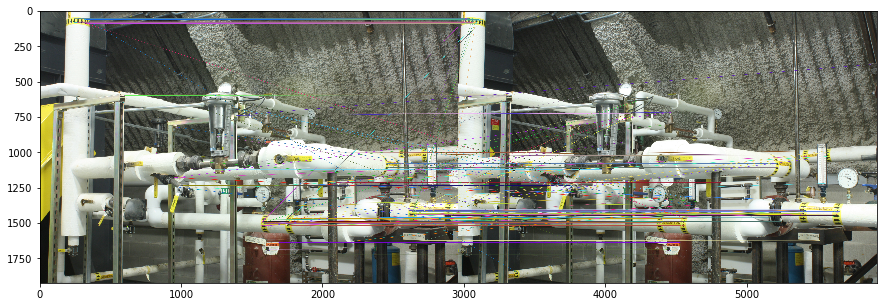

In [9]:
matches_im = cv2.drawMatches(im1, keypt_1, im2, keypt_2, matches[:1000], None, flags=2)

plt.figure(figsize=(15, 10))
plt.imshow(matches_im)

In [10]:
def test_1(im_1, im_2):
    fd = cv2.ORB_create()
    keypt_1, descr_1 = fd.detectAndCompute(im_1, mask=None)
    keypt_2, descr_2 = fd.detectAndCompute(im_2, mask=None)
    
fd_for_test_2 = cv2.ORB_create()

def test_2(im_1, im_2):
    keypt_1, descr_1 = fd_for_test_2.detectAndCompute(im_1, mask=None)
    keypt_2, descr_2 = fd_for_test_2.detectAndCompute(im_2, mask=None)

In [11]:
%timeit test_1(im_gray_1, im_gray_2)

204 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit test_2(im_gray_1, im_gray_2)

206 ms ± 2.63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
